In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from skimage.color import rgb2lab, deltaE_cie76

In [ ]:
import dill
dill.dump_session('sessions/extract_colors.pkl')

In [4]:
""" Read image """
img = cv2.imread('./img/lake/1.png')
h,w,c = img.shape
print(h, w, c)
print(img.shape)

467 566 3
(467, 566, 3)


In [38]:
""" Convert BGR (default) to RGB """
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(image[0][0][2])
print(len(image))
print(type(image))
# print(image[1])
# print(image[:1])
# plt.imshow(image)
# plt.imshow([[117, 127, 119]])

133
467
<class 'numpy.ndarray'>


In [57]:
def get_hex(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))
def get_img(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

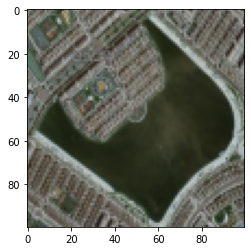

In [40]:
resized_img = cv2.resize(img, (100, 100), interpolation = cv2.INTER_AREA)
plt.imshow(resized_img)
reshaped_img = resized_img.reshape(resized_img.shape[0]*resized_img.shape[1], 3)

from: https://towardsdatascience.com/fit-vs-predict-vs-fit-predict-in-python-scikit-learn-f15a34a8d39f#:~:text=fit()%20method%20will%20fit,the%20learned%20parameters%20during%20fit%20.
- clustering estimators in scikit-learn must implement fit_predict() method but not all estimators do so
- the arguments passed to fit_predict() are the same as those to fit()

[[101.32717366 101.37313433  91.83866382]
 [ 44.61227224  48.81002144  31.78349411]
 [144.36687836 147.76990718 141.70249145]]


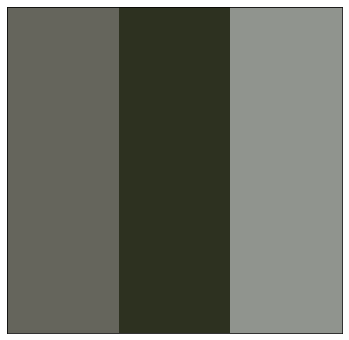

In [42]:
from sklearn.cluster import KMeans
number_of_colors = 3
clf = KMeans(n_clusters = number_of_colors)
labels = clf.fit_predict(reshaped_img)
centers = clf.cluster_centers_ # https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html


def show_palette(centers):
    scaled_colours = [[color / 255 for color in row] for row in centers]
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.axis(xmin=0, xmax=len(scaled_colours))
    ax.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
    for index, colour in enumerate(scaled_colours):
        ax.axvspan(index, index + 1, color=colour)
show_palette(centers)
print(centers)

Counter converts a list to a dict with list elements and their counts

In [129]:
from collections import Counter
counts = Counter(labels)
print(counts)
ordered_colors = [centers[i] for i in counts.keys()]
print(ordered_colors)
rgb_colors = [ordered_colors[i] for i in counts.keys()]
print(rgb_colors)

Counter({0: 4211, 2: 3720, 1: 2069})
[array([144.22755944, 147.6065017 , 141.53226589]), array([101.14349988, 101.19464835,  91.64740706]), array([44.4919268 , 48.70236814, 31.64881593])]
[array([101.14349988, 101.19464835,  91.64740706]), array([144.22755944, 147.6065017 , 141.53226589]), array([44.4919268 , 48.70236814, 31.64881593])]


In [96]:
# import matplotlib.pyplot as plt
# from mpl_toolkits import mplot3d
# from PIL import Image


# # path = './img/lake/1.png'
# # img = Image.open(path)
# # pixels = img.load()
# def image_to_pixels(img):
#     pixels = []
#     rows,cols,_ = img.shape
#     for i in range(rows):
#         for j in range(cols):
#             k = img[i,j]
#             pixels.append(k)
#     return pixels
# pixels = image_to_pixels(resized_img)
# pixels[:5]

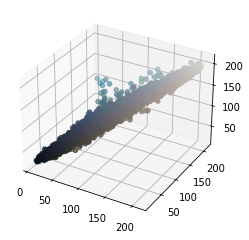

In [99]:
from PIL import Image
path = './img/lake/1.png'
img = Image.open(path)
img = img.resize((150,150), Image.ANTIALIAS)
pixels = img.load()


ax = plt.axes(projection = '3d')
x = []
y = []
z = []
c = []
for row in range(0, img.height):
     for col in range(0, img.width):
        px = pixels[col,row]
        newCol = (px[0] / 255, px[1] / 255, px[2] / 255)
         
        if(not newCol in c):
            x.append(px[0])
            y.append(px[1])
            z.append(px[2])
            c.append(newCol)
ax.scatter(x,y,z, c = c)
plt.show()

In [126]:
import dill
dill.dump_session('sessions/extract_colors.pkl')

TypeError: cannot pickle 'dict_keys' object

In [2]:
import dill
dill.load_session('sessions/extract_colors.pkl')

EOFError: Ran out of input